<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/More_USL_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierachical Clustering

## Agglomerative Clustering

En esta técnica, inicialmente cada punto de datos se considera un grupo individual. En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forman uno o K grupos.
1. Cada uno se considera único. En el paso inicial, calculamos la proximidad de puntos individuales y consideramos los seis puntos de datos como grupos individuales como se muestra en la imagen a continuación.
2. En el paso dos, los grupos similares se fusionan y se forman como un solo grupo. Consideremos que B, C y D, E son grupos similares que se fusionaron en el paso dos. Ahora, nos quedamos con cuatro grupos que son A, BC, DE, F.
En cada paso se calcula la proximidad y se llega al grupo final

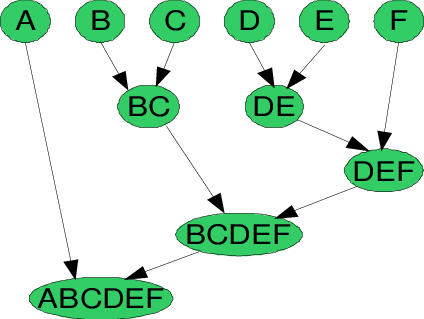

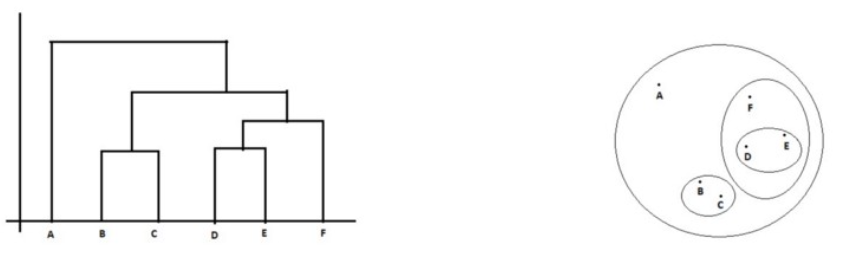

## Diviside Clustering
En palabras simples, podemos decir que el agrupamiento jerárquico divisivo es exactamente lo opuesto al agrupamiento jerárquico aglomerativo. En el agrupamiento jerárquico divisivo, consideramos todos los puntos de datos como un solo grupo y, en cada iteración, separamos los puntos de datos del grupo que no son similares. Cada punto de datos que se separa se considera un grupo individual. Al final, nos quedarán n grupos.

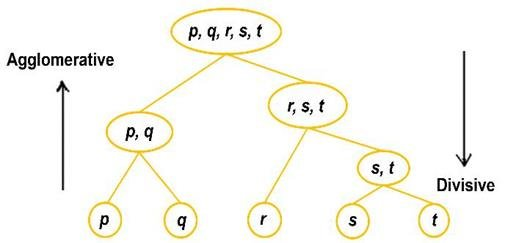

#HDBSCAN
Hierarchical Density-Based Spatial Clustering of Applications with Noise

HDBSCAN utiliza un enfoque basado en la densidad que hace pocas suposiciones implícitas sobre los clústeres. 

En lugar de buscar agrupaciones con una forma particular, busca regiones de los datos que sean más densas que el espacio circundante. 

La imagen mental que puede utilizar es intentar separar las islas del mar o las montañas de sus valles.



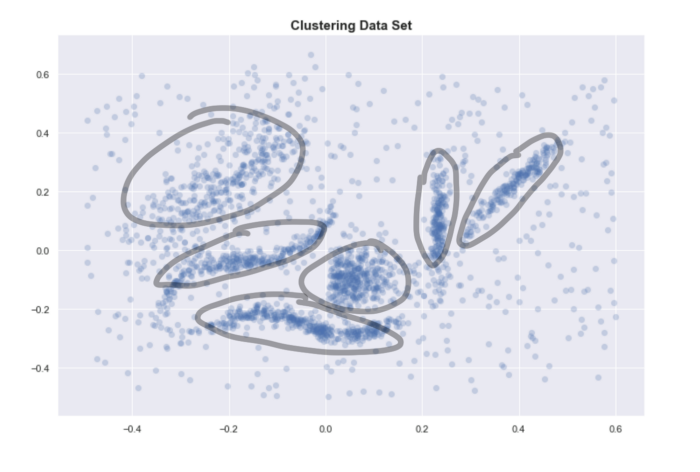

VEntajas:
* Facil de implementar y no requiere el numero de clusters
* Vamos a usar el Denfograma que permite ver cuantos clusters vamos a usar

Desventajas:
* Nos puede tomar mucho tiempo la ejecuón
* Muchas veces no es fácil identificar el número de clusters minimos con el dendograma

## Dendogram
Este paso consiste en encontrar el número óptimo de clústers. 

VAmos a usar loss dendogramas. El área de las regiones es la medida de persistencia, y el método se llama eom (Excess of mass). Un poco más formalmente, maximizamos la suma total de persistencia de los clústeres bajo la restricción de que los clústeres elegidos no se superponen.

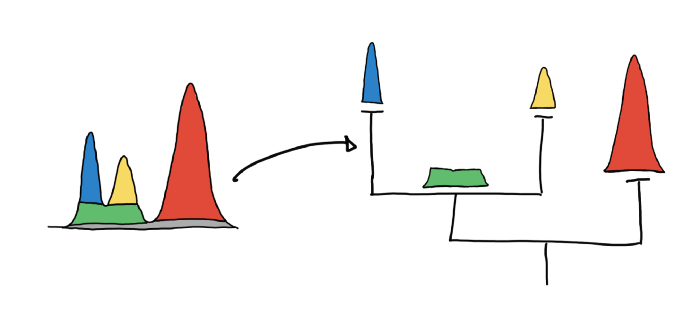

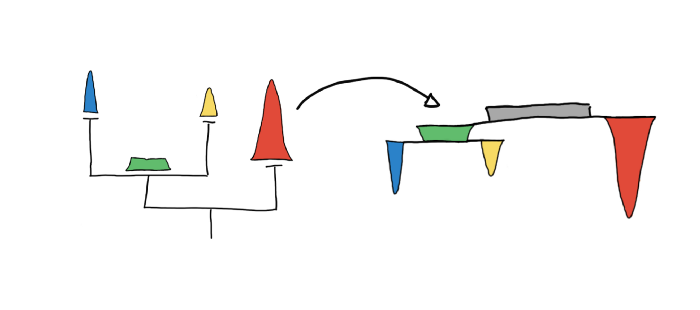

Básciamente lo que hace es conectar puntos y crea cluster a partir de:
* REgiones suficientemente densas
* Puntos qye esten lo suficientemente cercanos uno de los otros

Se le conoce como Mutual REachability Distance. 

In [ ]:
pip install hdbscan

     |████████████████████████████████| 6.4MB 4.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp36-cp36m-linux_x86_64.whl size=2311358 sha256=2b70b376d6336e946455a3b31c150569d6e796029862e1b24f251126abb1b8a5
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import pandas as pd
import time


In [ ]:
sns.set_context('poster')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Informaci´pon de nuestros clientes
#TEneoms su ingreso anual en miles
#TEnemos su score de gasto del 1 al 100

#Supervisado nosotros ya conocemos el output
#No supervisado no sabemos a que pertenece, lo que buscamos es a partir de los
#features una clusterización o grupos.

data = pd.read_csv('/content/drive/MyDrive/Databases/Week 19/customer_mall.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Quedarnos 2 features de nuestro dataset (para verlo graficamente)
X = data.iloc[:,[3,4]].values

In [ ]:
X

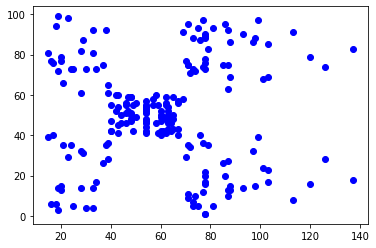

In [ ]:
plt.scatter(X.T[0],X.T[1],color='b')

In [ ]:
import scipy.cluster.hierarchy as sch
import hdbscan

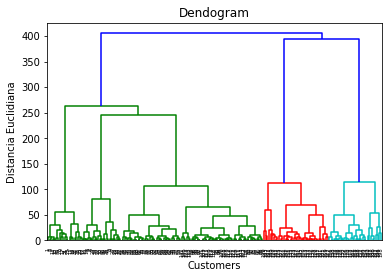

In [ ]:
#Dendograma
# Mirar la distancia vertical mas "larga" en la cual podríamos
#trazar una linea horizontal
#Lo que nos va a decir al trazar la linea y contar con cuantas se cruza
#Es el minimo tamaño de los clusters

#Se usa Ward porqué crea clústeres más compactos y de tamaño uniforme
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

In [ ]:
#Entrenamos
clusterer.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

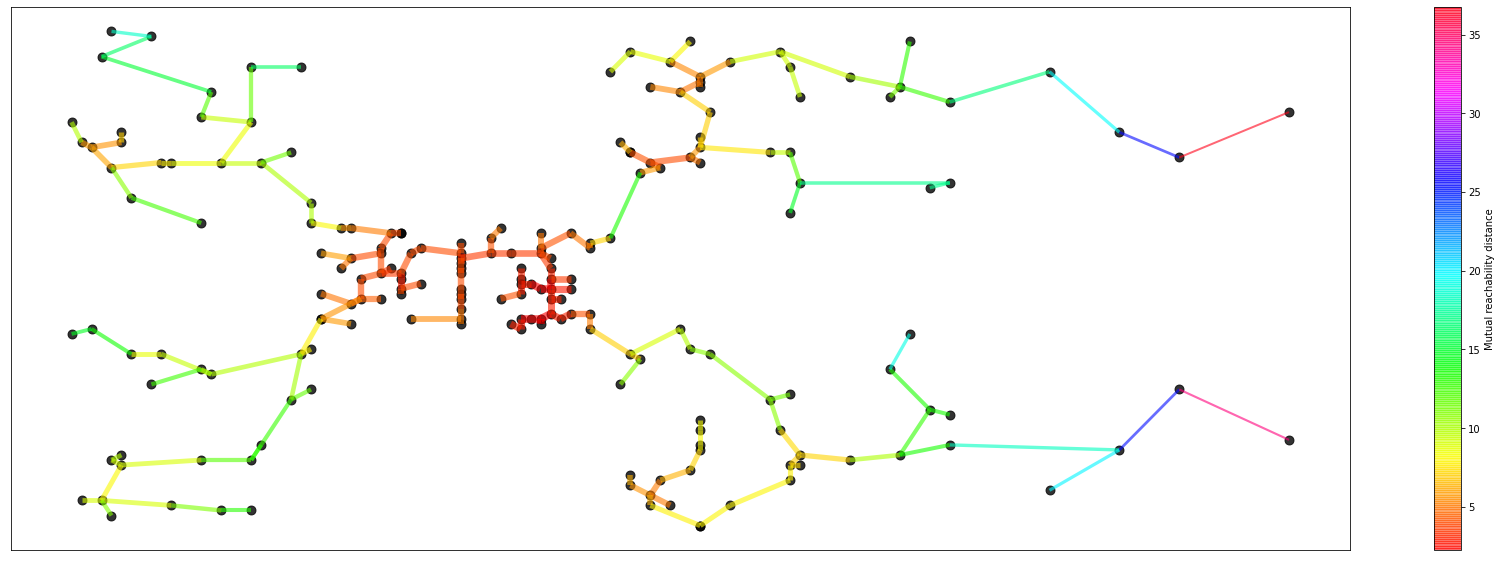

In [ ]:
#Donde el color sea más cercano a 0, es muy problable que sea un clpúster
#dada la densidad que se tiene
from matplotlib.pyplot import figure
figure(figsize=(30,10))
clusterer.minimum_spanning_tree_.plot(edge_cmap='hsv',edge_alpha=.6, node_size=80, edge_linewidth=2)

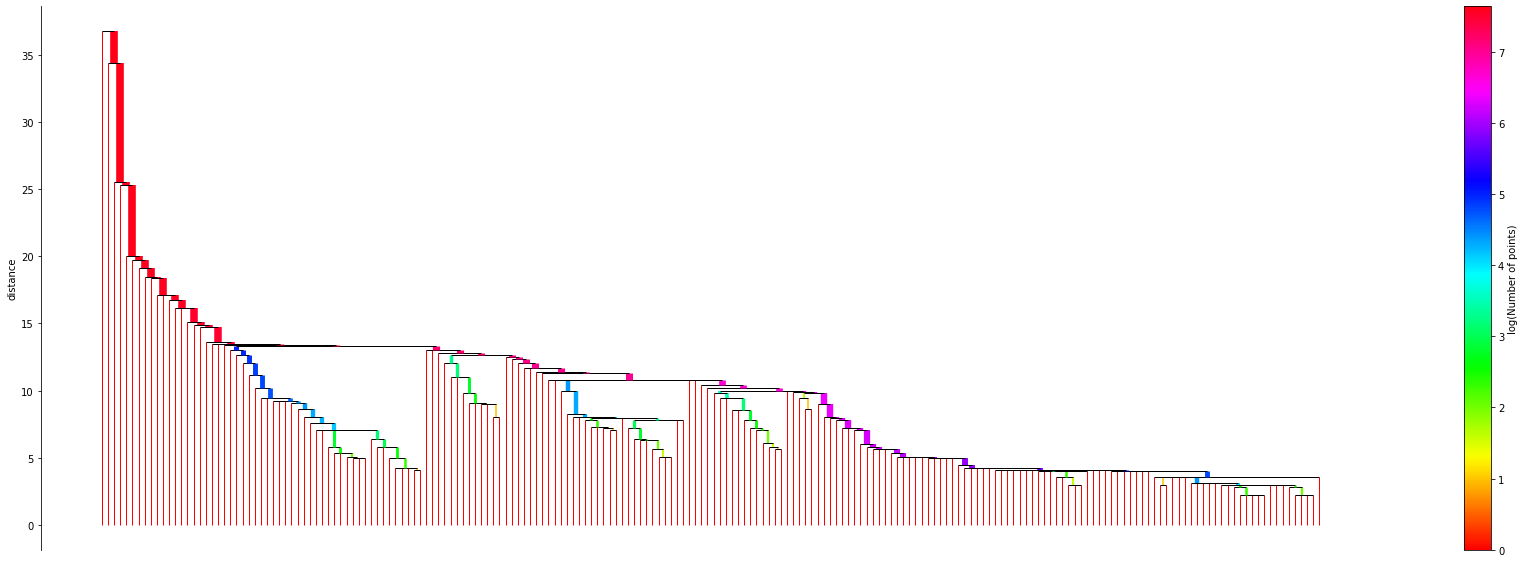

In [ ]:
figure(figsize=(30,10))
clusterer.single_linkage_tree_.plot(cmap='hsv',colorbar=True
                                    )

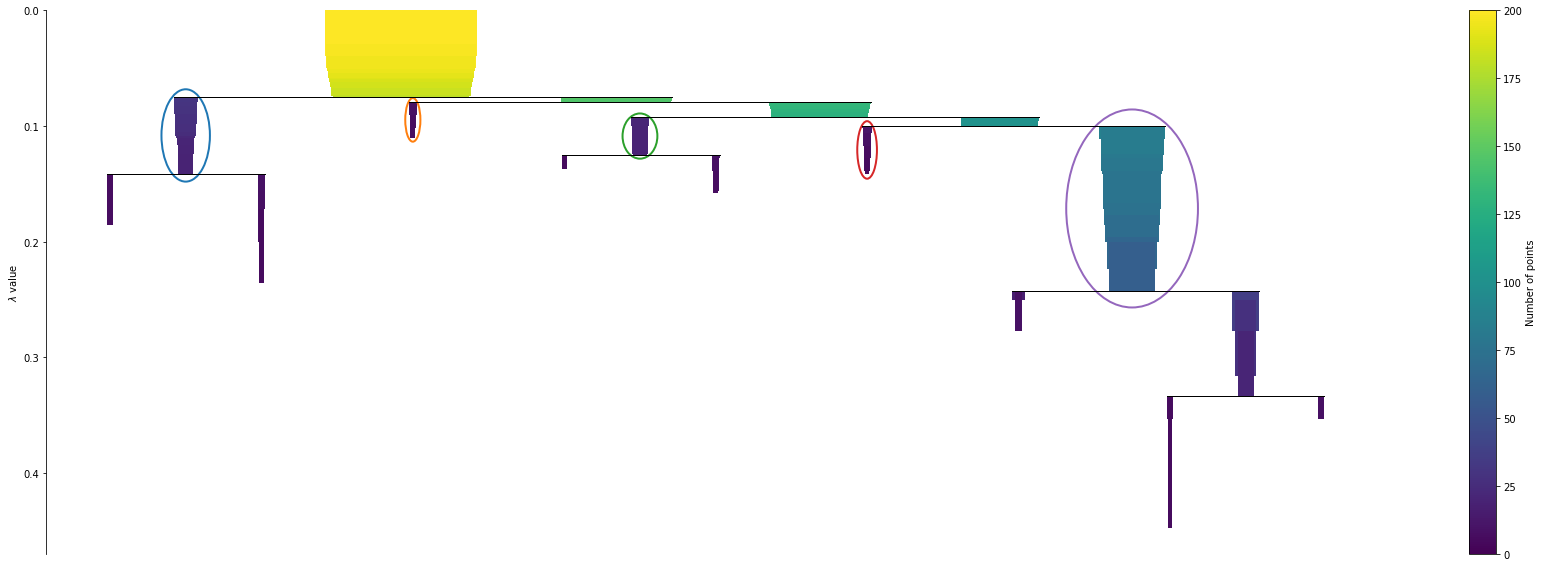

In [ ]:
#Condensed Tree
figure(figsize=(30,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

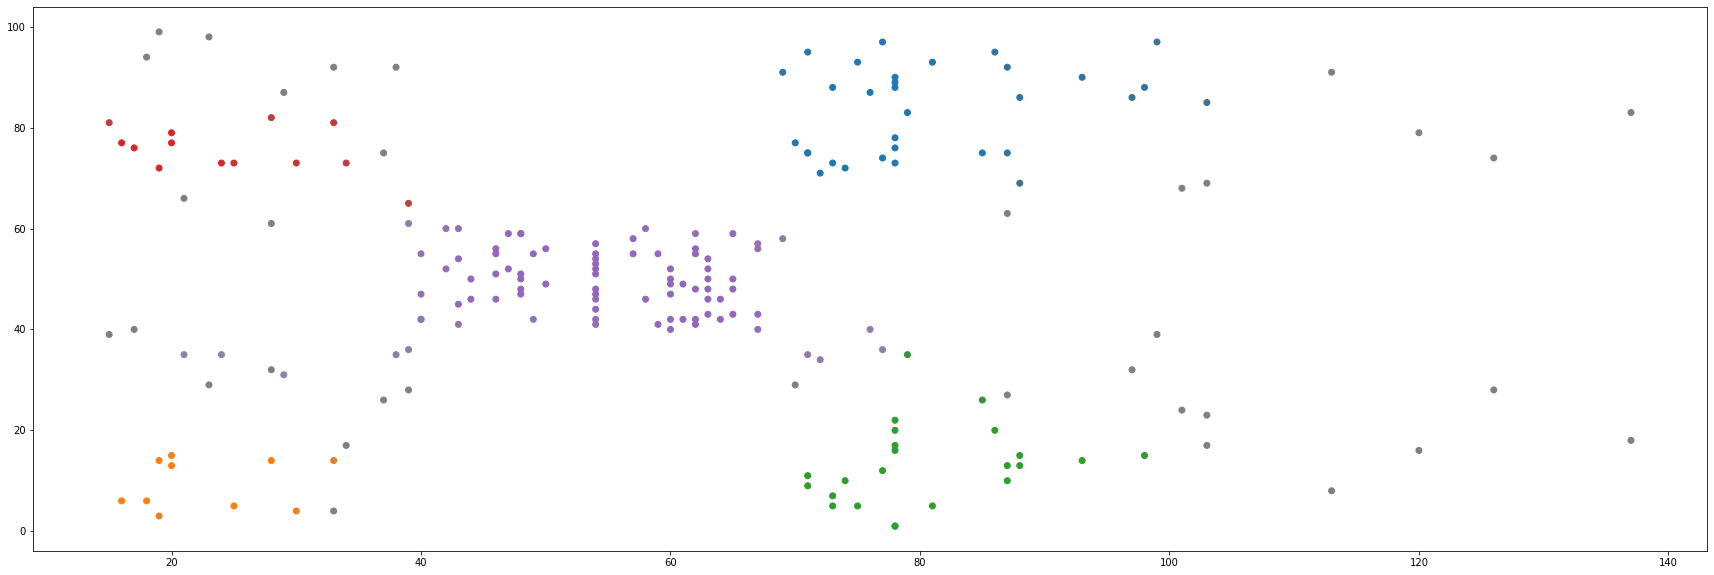

In [ ]:
palette = sns.color_palette()
clusterer_color = [sns.desaturate(palette[col],sat)
                    if col>=0 else(.5,.5,.5) for col,sat in zip(clusterer.labels_,clusterer.probabilities_) ]
figure(figsize=(30,10))
plt.scatter(X.T[0], X.T[1],c=clusterer_color)

#GMM

GMM asumismos que hay cierto numero de distribuciones gausiana y cada una de ellas representa un cluster. Teindre a grupar los puntos que pertenenecen a una fistribucion de manera conjunta

In [ ]:
x_frame =pd.DataFrame(X)
x_frame.columns=['AnnualIncome','SpendingScore']

In [ ]:
x_frame

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Figure size 2160x720 with 0 Axes>

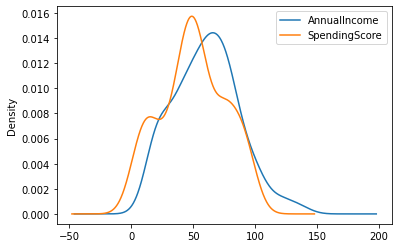

In [ ]:
figure(figsize=(30,10))
x_frame.plot(kind='kde')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

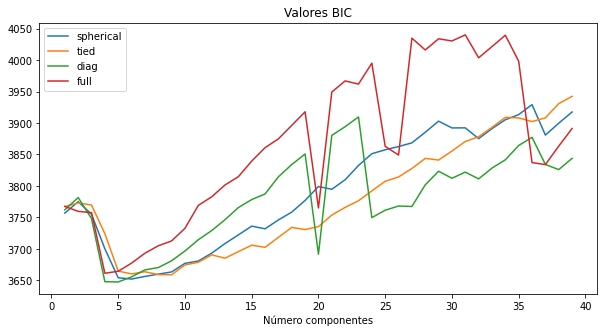

In [ ]:
# Entre mas bajo sea el valor de las 4 covarianzas, mejor.

fig, ax = plt.subplots(figsize=(10, 5))

n_components = range(1, 40)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GMM(n_components=i, covariance_type=covariance_type, random_state=123)
        modelo = modelo.fit(X)
        valores_bic.append(modelo.bic(X))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [ ]:
gm  = GMM(n_components=5, covariance_type='full',random_state=123)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=123, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
labels = gm.predict(X)

frame = pd.DataFrame(X)
frame['Cluster']= labels
frame.columns = ['AnnualIncome','SpendingScore','Cluster']

In [ ]:
frame

,AnnualIncome,SpendingScore,Cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


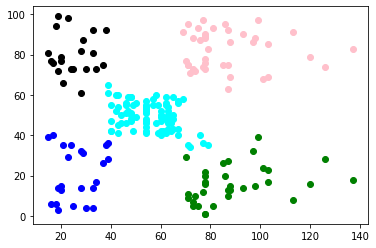

In [ ]:
color=['blue','green','cyan','pink','black']
for k in range(0,5):
  data = frame[frame['Cluster']==k]
  plt.scatter(data['AnnualIncome'],data['SpendingScore'],c=color[k])
plt.show()

#Visualizando CLusters

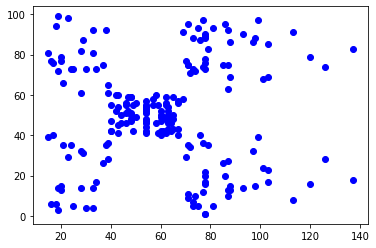

In [ ]:
plt.scatter(X.T[0],X.T[1],c='b')

In [ ]:
#Crear funcion para graficar todos mis algoritmos
def plot_clusters(data, algorithm, args, kwds):
  start_time= time.time()
  labels = algorithm(*args,**kwds).fit_predict(data)
  end_time =time.time()
  palette = sns.color_palette('deep',np.unique(labels).max()+1)
  #Si tiene cluster, color. Si no tiene, no color
  colors = [palette[x] if x>=0 else (0.0,0.0,0.0) for x in labels]
  plt.scatter(data.T[0],data.T[1], c=colors)
  plt.title('Clusters encontrados por{}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-.6,1,"Clusterizacion en {:.2f} segs".format(end_time - start_time), fontsize=24)

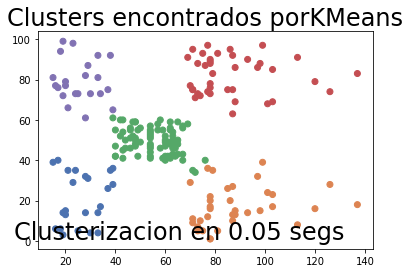

In [ ]:
plot_clusters(X,cluster.KMeans,(),{'n_clusters':5,'random_state':123})

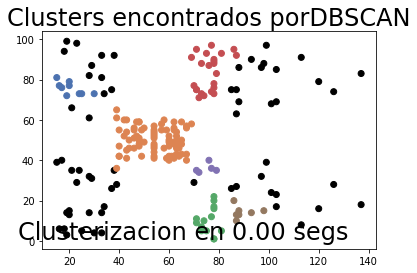

In [ ]:
plot_clusters(X,cluster.DBSCAN,(),{'eps':6.2})

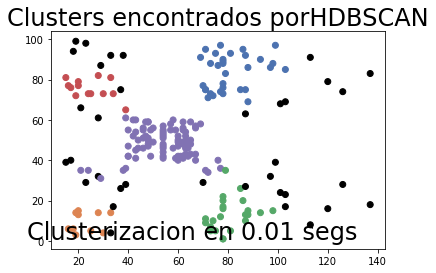

In [ ]:
plot_clusters(X,hdbscan.HDBSCAN,(),{'min_cluster_size':5})

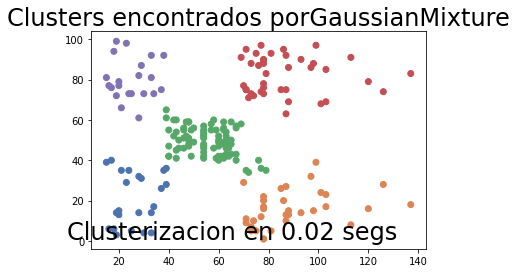

In [ ]:
plot_clusters(X,GMM,(),{'n_components':5,'covariance_type':'full','random_state':123})